In [1]:
%pip install colorstreak

In [2]:
from colorstreak import Logger as log
from matplotlib import pyplot as plt

import numpy as np

In [11]:


"""
Para los mínimos cuadrados ordinarios (MCO), se busca estimar los parámetros de un modelo lineal
Beta_1
formula = sum( (x_i - x_media) * (y_i - y) ) / sum( (x_i - x_media)**2 )

Beta_0
fomula = y_media - Beta_1 * x_media

"""

def betas(x, y):
    x_media = np.mean(x)
    y_media = np.mean(y)

    numerador = np.sum( (x - x_media) * (y - y_media) )
    denominador = np.sum( (x - x_media)**2 )

    beta_1 = numerador / denominador
    beta_0 = y_media - beta_1 * x_media

    return beta_0, beta_1


def error(x, y, beta_0, beta_1):
    y_pred = beta_0 + beta_1 * x
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    return mse


def ecuacion_recta(beta_0, beta_1):
    return f"y = {beta_0:.2f} + {beta_1:.2f} * x"



def mensaje_pendiente(beta_1: float):
    match beta_1:
        case val if val > 0:
            log.info("La pendiente es positiva: hay una relación directa")
        case val if val < 0:
            log.info("La pendiente es negativa: hay una relación inversa")
        case _:
            log.info("La pendiente es cero: no hay relación lineal")
            



tasa_de_interes_x = np.array([4.5, 5.0, 5.5, 6.0, 6.5])
inversion_privada_y = np.array([102, 98, 94, 90, 87])




beta_0, beta_1 = betas(tasa_de_interes_x, inversion_privada_y)
mse = error(tasa_de_interes_x, inversion_privada_y, beta_0, beta_1)
recta_pred = ecuacion_recta(beta_0, beta_1)

log.info(f"Beta 0: {beta_0:.2f}, Beta 1: {beta_1:.2f}")
log.info(f"Mean Squared Error: {mse:.4f}")
log.info(f"Ecuación de la recta: {recta_pred}")

mensaje_pendiente(beta_1)

mensaje_interpretacion = """
Por cada punto que sube la tasa de interes la inversión baja, 
y es normal por que ante mayor interes obvio menor inversión
"""
log.title(mensaje_interpretacion)
x = 5.8
inversion = beta_0 + beta_1 * x
log.debug(f"El valor para cuando x={x} la inversion es: {inversion:.2f}")



[INFO] Beta 0: 136.00, Beta 1: -7.60
[INFO] Mean Squared Error: 0.0800
[INFO] Ecuación de la recta: y = 136.00 + -7.60 * x
[INFO] La pendiente es negativa: hay una relación inversa
[TITLE] 
Por cada punto que sube la tasa de interes la inversión baja, 
y es normal por que ante mayor interes obvio menor inversión

[DEBUG] El valor para cuando x=5.8 la inversion es: 91.92


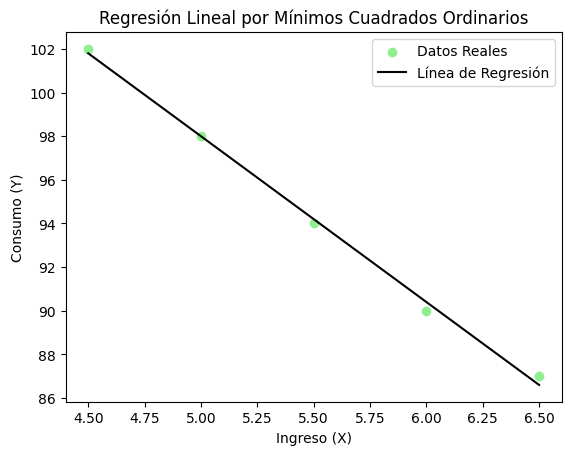

In [12]:
plt.scatter(tasa_de_interes_x, inversion_privada_y, color='lightgreen', label='Datos Reales')
plt.plot(tasa_de_interes_x, beta_0 + beta_1 * tasa_de_interes_x, color='black', label='Línea de Regresión')
plt.xlabel('Ingreso (X)')
plt.ylabel('Consumo (Y)')
plt.title('Regresión Lineal por Mínimos Cuadrados Ordinarios')
plt.legend()
plt.show()